In [1]:
import pandas as pd
import sys
sys.path.append('../')
from helper.display_cluster import faceId_to_ogId
import matplotlib.pyplot as plt
import cv2
from helper.face_detector import draw_bounding_boxes, retinaface_detect_face
import pathlib

In [10]:
df_keep = pd.read_csv("/media/bao/t7/la_lib_dataset/160k/df/keep.csv")
df_keep["image_id"] = df_keep["image"].apply(faceId_to_ogId)
print(f"Nb of images: {df_keep['image_id'].nunique()}")
print(f"Nb of faces: {df_keep.shape[0]}")
print(f"Nb of faces kept: {df_keep['keep'].sum()} ({df_keep['keep'].mean()*100:.2f}%)")

Nb of images: 116699
Nb of faces: 623138
Nb of faces kept: 153019 (24.56%)


In [70]:
def plot_faces_distribution(df: pd.DataFrame):
    # group by image_id
    df_imageId_count = df.groupby("image_id").agg({"image": "count"}).reset_index()

    # index => the number of faces
    # image => the number of images with that number of faces
    fig, ax = plt.subplots(figsize=(25, 5))
    df_imageId_count["image"].value_counts().reset_index().sort_values("index").plot.bar(x="index", y="image", ax=ax, logy=True)
    ax.set_xlabel("Number of faces")
    ax.set_ylabel("Number of images (log scale)")
    # ax.legend(["Number of images"])
    # remove legend
    ax.get_legend().remove()

    # show the median
    median = df_imageId_count["image"].median()
    ax.axvline(x=median - 1, color="red", linestyle="--")

    # average between the median and the next value
    current_value = df_imageId_count["image"].value_counts().reset_index().sort_values("index").iloc[int(median - 1)]["image"]
    next_value = df_imageId_count["image"].value_counts().reset_index().sort_values("index").iloc[int(median)]["image"]
    average = (current_value + next_value) / 2

    ax.text(median - 0.5, average, f"Median: {median}", color="red", fontsize=15)

    # print the average 
    print(f"Average number of faces per image: {df_imageId_count['image'].mean():.2f}")

    # show the mean
    # mean = df_imageId_count["image"].mean()
    # ax.axvline(x=mean - 1, color="green", linestyle="--")
    # ax.text(mean - 0.5, average, f"Mean: {mean:.2f}", color="green", fontsize=15)

    plt.show()

Average number of faces per image: 5.34


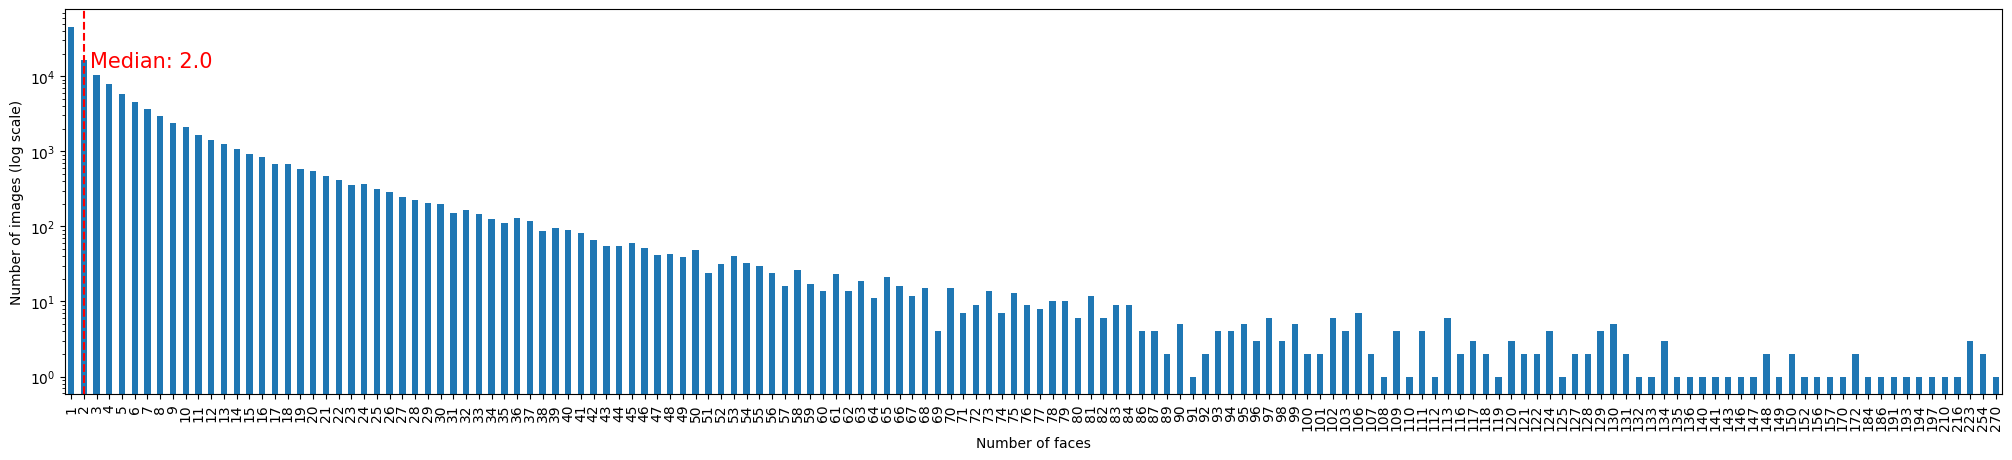

In [71]:
plot_faces_distribution(df_keep)

Average number of faces per image: 1.96


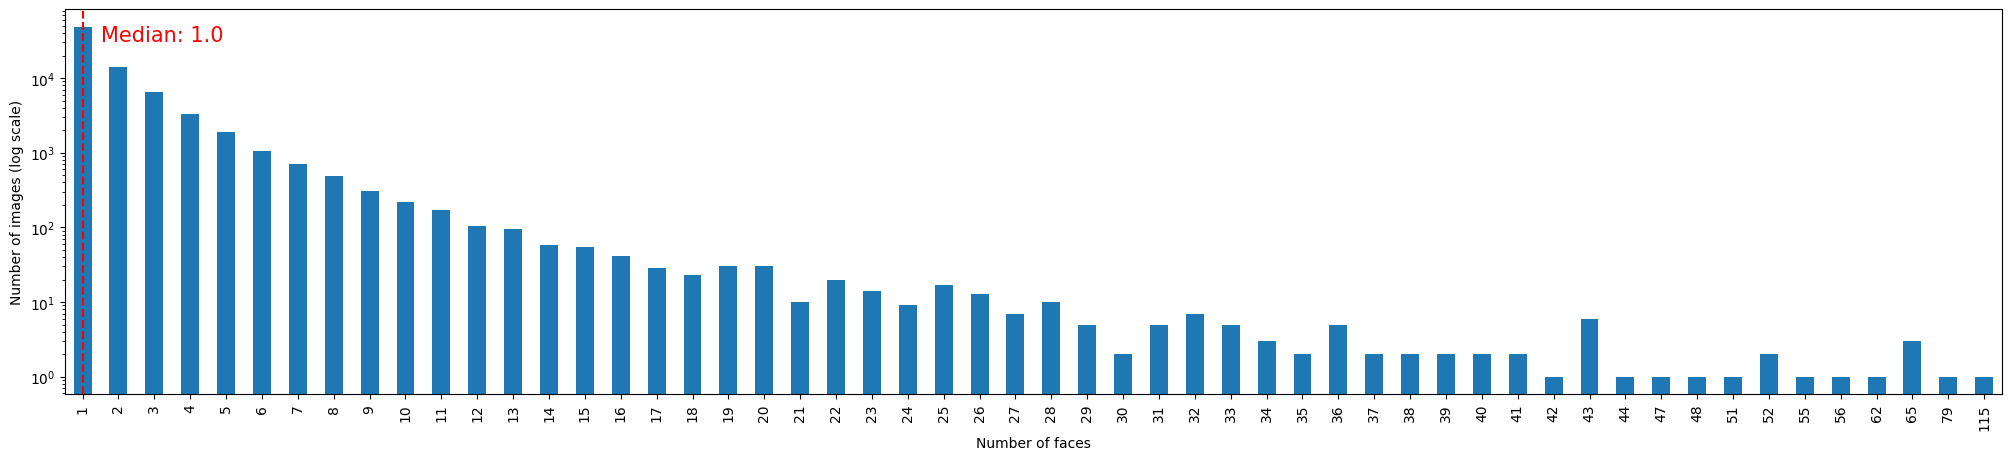

In [72]:
df_keep_true = df_keep[df_keep["keep"] == True].copy()
plot_faces_distribution(df_keep_true)

In [24]:
df_imageId_count = df_keep_true.groupby("image_id").agg({"image": "count"}).reset_index()
df_imageId_count.sort_values("image", ascending=False).head(4)

image_id  image
58495  By3gzDdaKsS9vdfX83LUqn    115
63757  D1ULihYj4ez82uAfKhlR4z     79
16837  3Sgcrx4y48-8r7Td7RJYKY     65
67556  Doa1OwAm4XtAXDGByPZqbF     65

In [4]:
# show id of the two images with most faces
df_imageId_count = df_keep.groupby("image_id").agg({"image": "count"}).reset_index()
df_imageId_count.sort_values("image", ascending=False).head(4)

image_id  image
62652   8Y29V8HT48TBNjxmT7iD1I    270
104191  EFpD8445aZaAxYjyfyUkVD    254
14018   1w40VJwGKGCA9u0R6w7ECY    254
76589   ATo7YAWiK0hBbHF_vUDHYV    223

In [5]:
def my_face_detect(img_name: str, threshold=0.95) -> dict:
    """
    Compare the face dectection on a given image: preview vs original quality
    """
    fig, ax = plt.subplots(figsize=(10, 10))

    img_original_path = pathlib.Path("/media/bao/t7/la_lib_dataset/img") / img_name

    img_original_bgr = cv2.imread(str(img_original_path))

    obj_original = retinaface_detect_face(img_original_bgr, align=False, threshold=threshold)

    img_original_h, img_original_w, _ = img_original_bgr.shape
    img_original_size = img_original_path.stat().st_size # in bytes
    title = f"{len(obj_original)} faces detected with {threshold=}"
    ax.set_title(title)
    draw_bounding_boxes(img_original_bgr, obj_original, ax=ax)

Could maybe highlight the faces kepts 

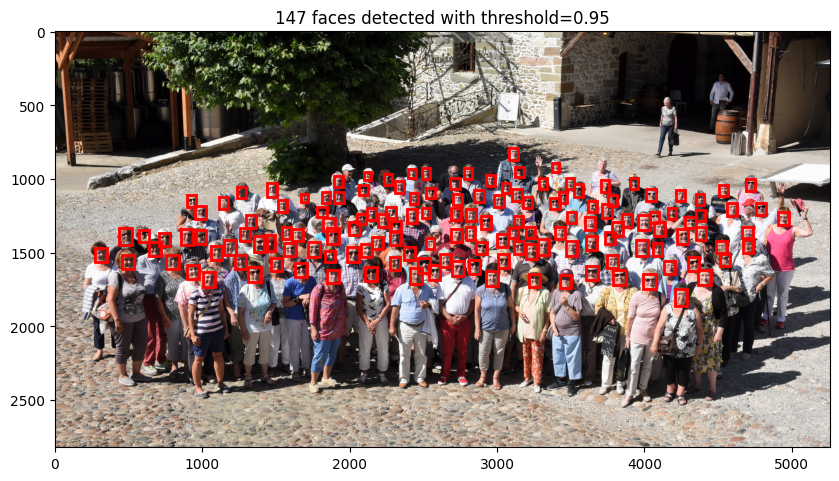

In [46]:
my_face_detect("By3gzDdaKsS9vdfX83LUqn.jpg")

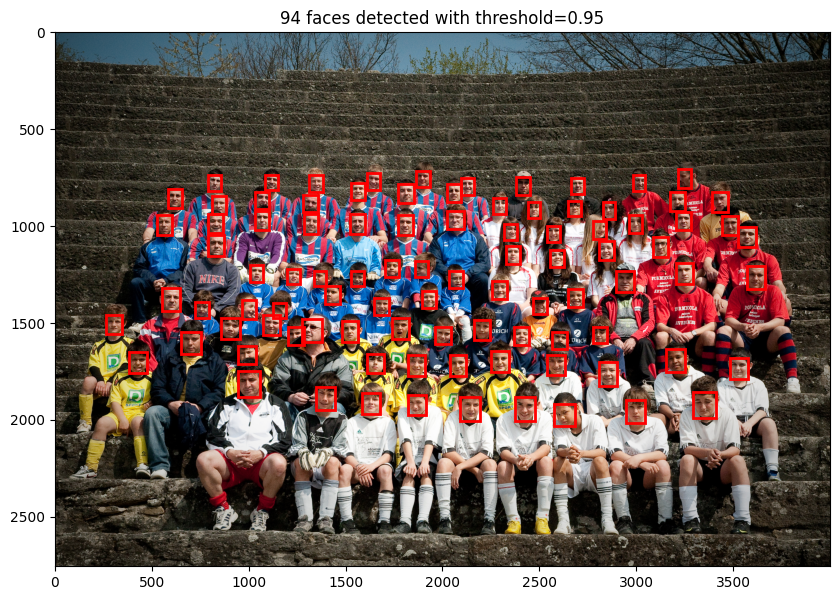

In [47]:
my_face_detect("D1ULihYj4ez82uAfKhlR4z.jpg")

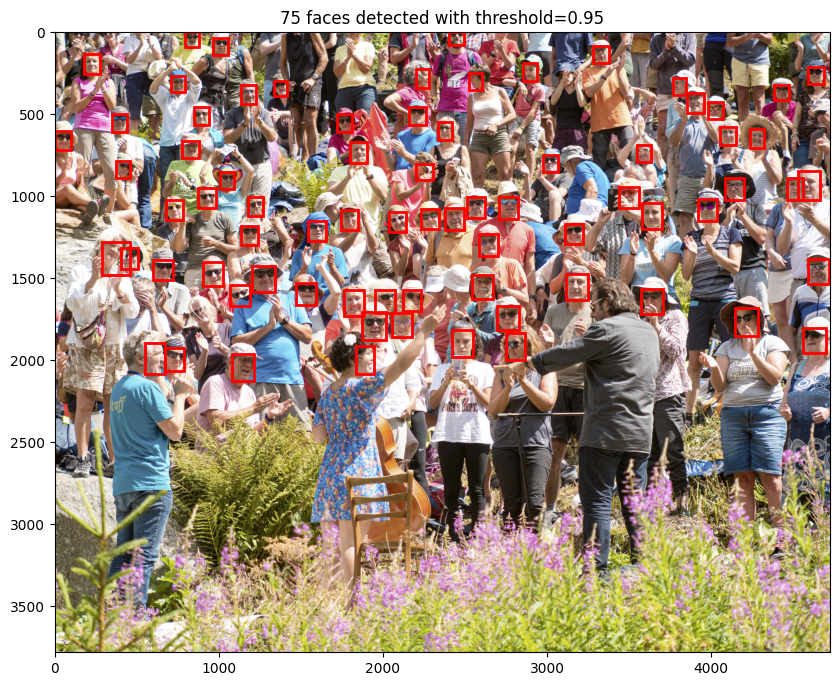

In [48]:
my_face_detect("3Sgcrx4y48-8r7Td7RJYKY.jpg")

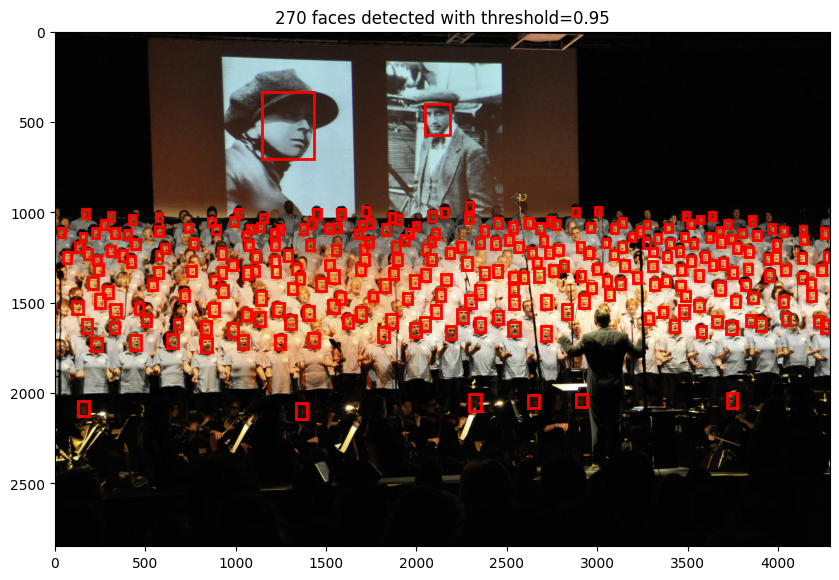

In [12]:
my_face_detect("8Y29V8HT48TBNjxmT7iD1I.jpg")

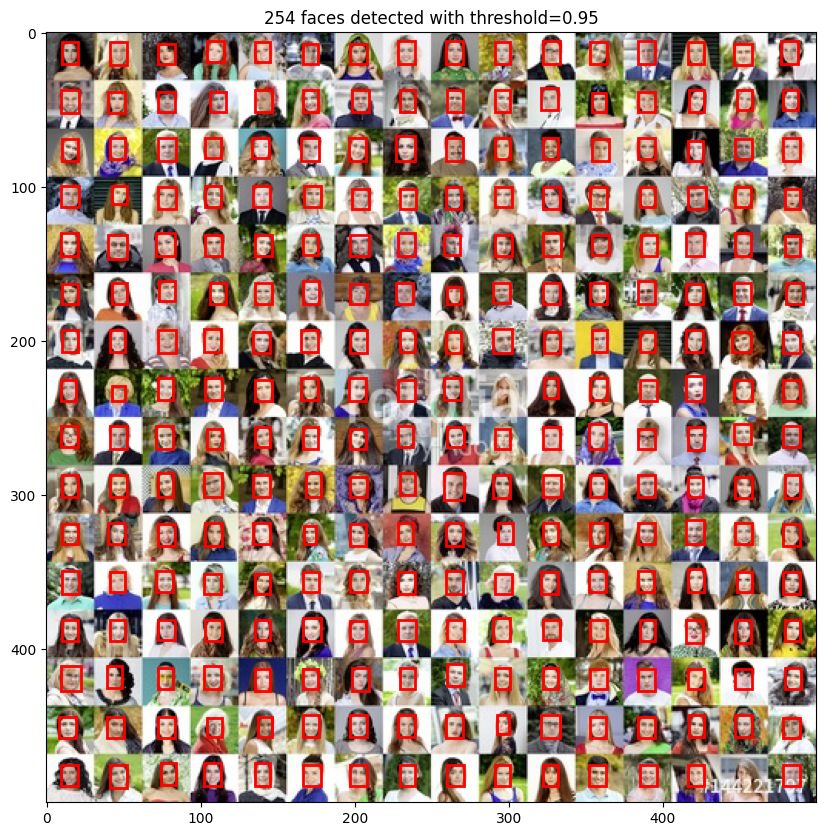

In [13]:
my_face_detect("EFpD8445aZaAxYjyfyUkVD.jpg")

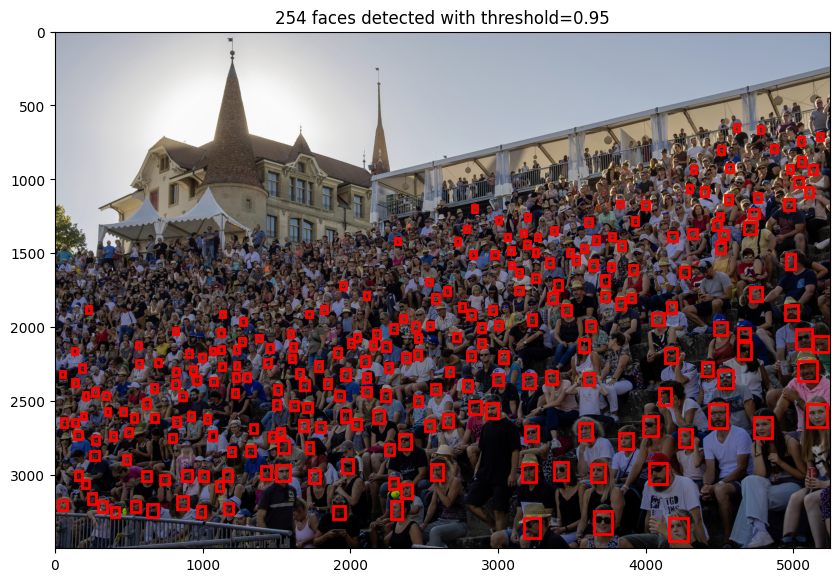

In [14]:
my_face_detect("1w40VJwGKGCA9u0R6w7ECY.jpg")

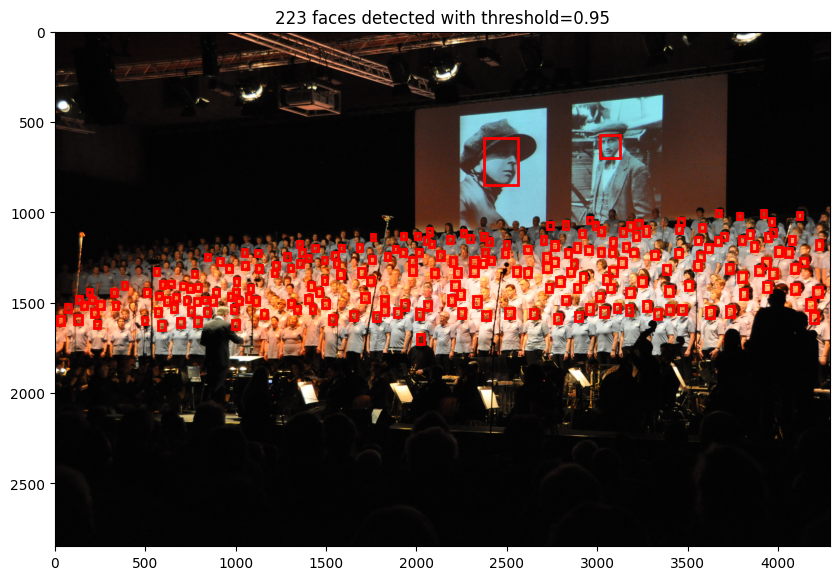

In [15]:
my_face_detect("ATo7YAWiK0hBbHF_vUDHYV.jpg")